## The purpose of this file
Make an aggregate adjacency matrix and save it.
> Be sure to add $\tau$ (the number of snapshots you make) to the filename.

In [1]:
import sys
sys.path.append('../')
import powerlaw
import pandas as pd
import networkx as nx
import toolbox as tb
%matplotlib inline

In [2]:
tag = "kobe"
hashtag = "神戸" # This variable is necessary for data processing in the module 'toolbox'.
timespan = "21-29"
file = f"../data/datasets/{tag}/{tag}_{timespan}.pkl"
df = tb.get_dataframe(hashtag, file)
df.shape

(25808, 4)

In [3]:
start = "2022-11-23T00:00+09:00"
end = "2022-11-23T23:59+09:00"
timespan = "23-23"
start = pd.to_datetime(start)
end = pd.to_datetime(end)
DF = df[(start <= df.index) & (df.index <= end)]

DF = df.copy()

In [4]:
tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'minutes=15')
#tau, snapshots = tb.get_snapshots_closed_intervals(DF, 'hours=1')
print(f"tau = {tau}")

tau = 87


In [5]:
edgelst_of_snapshots = tb.get_edgelist_of_eachsnapshot(df,tau, snapshots)
filename = f'../data/graph_data/{tag}/original/{hashtag}_{timespan}_{tau}_aam'
print(filename)
#G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots, fname=filename)
G = tb.make_aggregate_adjacency_matrix(edgelst_of_snapshots)

../data/graph_data/kobe/original/神戸_23-23_87_aam


In [6]:
G.number_of_nodes()

20426

In [ ]:
tb.check_degree(G)

In [ ]:
tb.plot_dd(G, 20)

In [ ]:
tb.fit_power_law(G)

In [ ]:
tb.compare_distribution(G,"power_law", "exponential")

In [ ]:
tb.compare_distribution(G,"power_law", "lognormal")

In [ ]:
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")

The following is for when the network created during the entire period is too large to draw the degree distribution (`3_modified_aam.ipynb`) due to lack of memory.

In [7]:
G.remove_node(hashtag)
#G.remove_nodes_from([hashtag, ""])
print(f"Isolates after removal of the searchtag: \n{list(nx.isolates(G))}")
print("These isolate nodes are to be removed.")
G.remove_nodes_from(list(nx.isolates(G)))
assert len(list(nx.isolates(G))) == 0, "There is at least one isolate node left."
print("============================================")
print("The isolate nodes were successfully deleted.")

Isolates after removal of the searchtag: 
['だらだらトーク定例会', '짜파게티', 'いつでもコーヒー', '豆皿小皿食卓とワイン', 'balletstudiosora', 'ランチ💕', 'theflavordesign', '花耶', 'イノアカラー', 'ラベンダーブラウン', 'apプロ', '2013/10/13', 'サツマスギ', 'ひまわりの太陽', '中東開催はなんなら日本開催より頑張れば全試合見れてしまうのが嬉しいようなシンドイような嬉しさ']
These isolate nodes are to be removed.
The isolate nodes were successfully deleted.


In [8]:
tb.check_degree(G)

singleton:[]


,degree
kobe,5030
三宮,4014
兵庫,2973
元町,2326
神戸グルメ,2071
...,...
"鉄人28号""のモニュメント設置のHPに""鉄人28号""には版権があり、勝手に撮影したり、絵に描いたものを個人で楽しむ以外で勝手に使う行為を禁止するとあったので削除しました。",1
ヲタ活,1
runtastic,1
せぎも,1


In [ ]:
tb.fit_power_law(G)

In [ ]:
tb.compare_distribution(G,"power_law", "exponential")

In [ ]:
tb.compare_distribution(G,"power_law", "lognormal")

In [9]:
# Save figure for future use
fname1 = f"../data/figure/degree_distribution/pdfccdf1_{tag}_{timespan}_{tau}.pdf"
fname2 = f"../data/figure/degree_distribution/pdfccdf2_{tag}_{timespan}_{tau}.pdf"
print(fname1)
print(fname2)

../data/figure/degree_distribution/pdfccdf1_kobe_23-23_87.pdf
../data/figure/degree_distribution/pdfccdf2_kobe_23-23_87.pdf


Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.725709086193488, 
its standard error sigma: 0.07694556504736823, 
k_min: 130.0


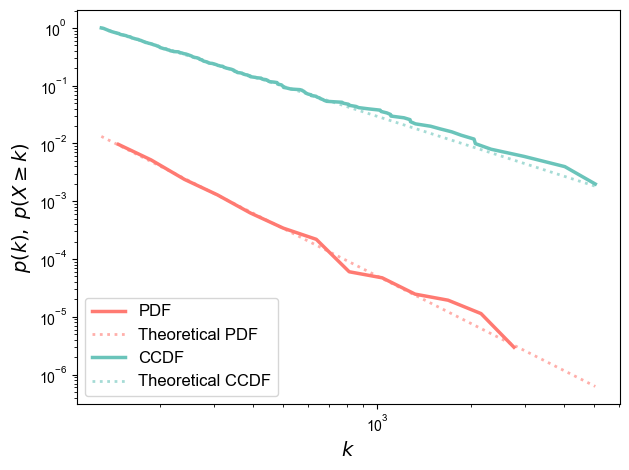

In [10]:
#tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname1)
tb.plot_pdf_ccdf(G, Pcolor="#FF7A72", Ccolor="#6AC4BA")

Calculating best minimal value for power law fit
------------------------------------------------
the fitted parameter alpha: 2.725709086193488, 
its standard error sigma: 0.07694556504736823, 
k_min: 130.0


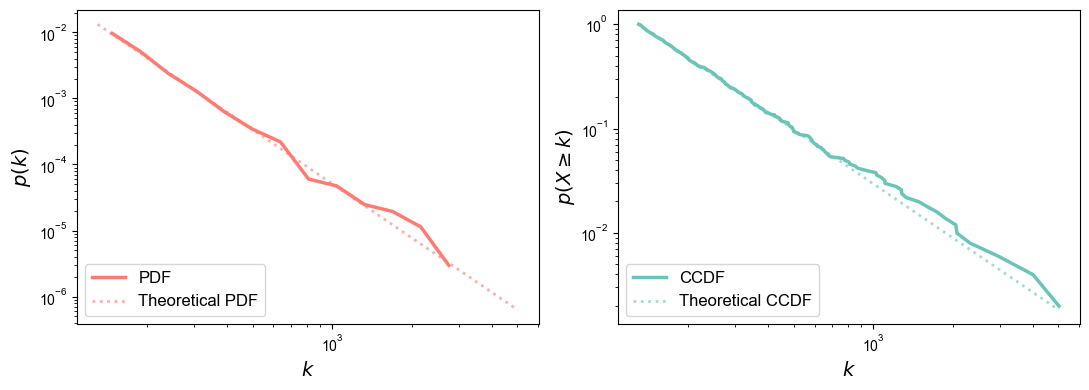

In [11]:
tb.plot_pdf_ccdf(G, sep=True, Pcolor="#FF7A72", Ccolor="#6AC4BA", fname=fname2)

In [12]:
# Save modified aam for statistical test
nx.write_graphml(G, f'../data/graph_data/{tag}/modified/{hashtag}_{timespan}_{tau}_mdaam.graphml', encoding='utf-8')